# Module 20: Circle (database)
# Segment 2
Chandler Kaiden, crkaide

In [1]:
# Dependencies

import pandas as pd
import datetime
import time
import numpy as np


In [2]:
# Reading in new data

url1 = "https://raw.githubusercontent.com/ddw26/Team-Frist-Center/circle_role_crkaide/new_data/trip_20201.csv"
new_data_1 = pd.read_csv(url1, low_memory = False)

url2 = "https://raw.githubusercontent.com/ddw26/Team-Frist-Center/circle_role_crkaide/new_data/trip_20202.csv"
new_data_2 = pd.read_csv(url2, low_memory = False)

url3 = "https://raw.githubusercontent.com/ddw26/Team-Frist-Center/circle_role_crkaide/new_data/trip_20203.csv"
new_data_3 = pd.read_csv(url3, low_memory = False)

url4 = "https://raw.githubusercontent.com/ddw26/Team-Frist-Center/circle_role_crkaide/new_data/trip_20204.csv"
new_data_4 = pd.read_csv(url4, low_memory = False)

url5 = "https://raw.githubusercontent.com/ddw26/Team-Frist-Center/circle_role_crkaide/new_data/trip_20205.csv"
new_data_5 = pd.read_csv(url5, low_memory = False)

url6 = "https://raw.githubusercontent.com/ddw26/Team-Frist-Center/circle_role_crkaide/new_data/trip_20206.csv"
new_data_6 = pd.read_csv(url6, low_memory = False)


In [3]:
# Check new dataframes

new_data_1
new_data_2
new_data_3
new_data_4
new_data_5
new_data_6

new_data_6.columns


Index(['prim2_common', 'prim1_common', 'strat_id', 'psu_id', 'YEAR', 'REG_RES',
       'ST_RES', 'CNTY_RES', 'ST', 'CNTY', 'INTSITE', 'MODE_F', 'MODE_FX',
       'AREA', 'AREA_X', 'HRSF', 'ADD_HRS', 'FFDAYS12', 'FFDAYS2', 'CNTRBTRS',
       'NUM_TYP2', 'NUM_TYP3', 'NUM_TYP4', 'NUM_TYP6', 'PARTY', 'FIRST',
       'ID_CODE', 'SUB_REG', 'WAVE', 'CATCH', 'ON_LIST', 'BOAT_HRS',
       'NUM_TYP9', 'telefon', 'COASTAL', 'kod', 'new_list', 'ASG_CODE',
       'MODE_ASG', 'PRT_CODE', 'CELLTYPE', 'imp_rec', 'region',
       'strat_interval', 'month', 'fshinsp_a', 'num_fish_a', 'COUNTY', 'TIME',
       'tsn1', 'tsn2', 'DISTKEYS', 'GEAR', 'PVT_RES', 'SEP_FISH', 'ADD_PH',
       'F_BY_P', 'GENDER', 'AGE', 'REEF', 'date1', 'DIST', 'prim1', 'prim2',
       'MODE2001', 'TURTLE', 'REEFCODE', 'AREA_NC', 'ART_REEF', 'muni_res',
       'muni_trp', 'wp_int', 'VAR_ID', 'ARX_METHOD', 'ALT_FLAG', 'LEADER',
       'ZIP', 'date_published'],
      dtype='object')

In [4]:
# Select keep columns from all dataframes

keep_columns = [
    "date1",
    "prim1_common",
    "AREA_X",
    "BOAT_HRS",
    "CATCH",
    "DIST",
    "fshinsp_a",
    "GEAR",
    "HRSF",
    "kod",
    "MODE_F",
    "MODE_FX",
    "month",
    "SUB_REG",
    "TIME",
    "WAVE",
    
    # New columns added since segment 1

    "AGE",
    "AREA",
    "CNTRBTRS",
    "CNTY",
    "GENDER",
    "PARTY",
    "ST",
    "TURTLE" # frame on final product as "good luck charm"
]

# HRS_DTD: not in url1
# RIG: not in url1

new_data_1 = new_data_1[keep_columns]
new_data_2 = new_data_2[keep_columns]
new_data_3 = new_data_3[keep_columns]
new_data_4 = new_data_4[keep_columns]
new_data_5 = new_data_5[keep_columns]
new_data_6 = new_data_6[keep_columns]


In [5]:
# Check new dataframe columns for consistency before concatenating

df_column_check = pd.DataFrame(
    new_data_1.columns,
    new_data_6.columns
)

df_column_check


0
date1                date1
prim1_common  prim1_common
AREA_X              AREA_X
BOAT_HRS          BOAT_HRS
CATCH                CATCH
DIST                  DIST
fshinsp_a        fshinsp_a
GEAR                  GEAR
HRSF                  HRSF
kod                    kod
MODE_F              MODE_F
MODE_FX            MODE_FX
month                month
SUB_REG            SUB_REG
TIME                  TIME
WAVE                  WAVE
AGE                    AGE
AREA                  AREA
CNTRBTRS          CNTRBTRS
CNTY                  CNTY
GENDER              GENDER
PARTY                PARTY
ST                      ST
TURTLE              TURTLE

In [6]:
# Assemble new dataframe

df_filtered = pd.concat([
    new_data_1,
    new_data_2,
    new_data_3,
    new_data_4,
    new_data_5,
    new_data_6
])

df_filtered


date1      prim1_common  AREA_X  BOAT_HRS  CATCH  DIST  \
0      20FEB202011:30      COMMON SNOOK       1       NaN    2.0   1.0   
1      20FEB202011:30     CREVALLE JACK       1       NaN    2.0   1.0   
2      20FEB202011:30               NaN       1       NaN    2.0   1.0   
3      20FEB202011:30           PINFISH       1       NaN    2.0   1.0   
4      20FEB202011:30               NaN       1       NaN    2.0   1.0   
...               ...               ...     ...       ...    ...   ...   
12261  20JAN202114:25               NaN       5       NaN    1.0   8.0   
12262  20JAN202114:25  SPOTTED SEATROUT       5       NaN    2.0   8.0   
12263  20JAN202114:25  SPOTTED SEATROUT       5       NaN    2.0   8.0   
12264  20JAN202114:25        SHEEPSHEAD       5       NaN    1.0   8.0   
12265  20JAN202114:25  SPOTTED SEATROUT       5       NaN    2.0   8.0   

       fshinsp_a  GEAR  HRSF kod  ...    TIME  WAVE    AGE  AREA  CNTRBTRS  \
0            NaN   1.0   1.0  we  ...  1318.0     1   56.0     1       1.0   
1            NaN   1.0   5.0  we  ...  1332.0     1   66.0     1       1.0   
2            0.0   1.0   5.0  we  ...  1333.0     1   68.0     1       1.0   
3            NaN   1.0   4.0  we  ...  1408.0     1  999.0     1       1.0   
4            NaN   1.0   4.0  we  ...  1409.0     1  999.0     1       1.0   
...          ...   ...   ...  ..  ...     ...   ...    ...   ...       ...   
12261        3.0   1.0   3.0  we  ...  1425.0     6   60.0     5       1.0   
12262        NaN   1.0   4.0  we  ...  1435.0     6   33.0     5       1.0   
12263        NaN   1.0   4.0  we  ...  1440.0     6   30.0     5       1.0   
12264       11.0   1.0   6.0  we  ...  1510.0     6   34.0     2       1.0   
12265        NaN   1.0   6.0  we  ...  1525.0     6   81.0     5       1.0   

       CNTY  GENDER PARTY  ST  TURTLE  
0      86.0     1.0   NaN  12     NaN  
1      86.0     1.0   NaN  12     NaN  
2      86.0     2.0   NaN  12     NaN  
3      11.0     1.0   NaN  12     NaN  
4      11.0     1.0   NaN  12     NaN  
...     ...     ...   ...  ..     ...  
12261  59.0     1.0   2.0  28     NaN  
12262  59.0     1.0   2.0  28     NaN  
12263  59.0     1.0   2.0  28     NaN  
12264  59.0     1.0   1.0  28     NaN  
12265  47.0     1.0   1.0  28     NaN  

[119586 rows x 24 columns]

In [7]:
# Drop NaN from dataframe

df_filtered = df_filtered.dropna()
df_filtered


date1      prim1_common  AREA_X  BOAT_HRS  CATCH  DIST  \
742   16MAR20:08:31  SPOTTED SEATROUT       5       7.0    1.0   8.0   
746   16MAR20:08:31          RED DRUM       5       5.0    2.0   8.0   
747   16MAR20:08:31          RED DRUM       5       5.0    2.0   8.0   
749   16MAR20:08:31          RED DRUM       5       6.0    2.0   8.0   
750   16MAR20:08:31          RED DRUM       5       6.0    2.0   8.0   
...             ...               ...     ...       ...    ...   ...   
8674  19JAN21:09:25  SPOTTED SEATROUT       5       8.0    1.0   8.0   
8679  19JAN21:09:25  SPOTTED SEATROUT       5       8.0    1.0   8.0   
8683  19JAN21:09:25  SPOTTED SEATROUT       5       4.5    1.0   8.0   
8687  19JAN21:09:25  SPOTTED SEATROUT       5       7.0    1.0   8.0   
8703  19JAN21:09:25  SPOTTED SEATROUT       5       7.0    1.0   8.0   

      fshinsp_a  GEAR  HRSF kod  ...    TIME  WAVE   AGE  AREA  CNTRBTRS  \
742         3.0   1.0   6.0  wd  ...  1512.0     1  52.0     3       2.0   
746         0.0   1.0   4.5  we  ...  1250.0     1  69.0     3       1.0   
747         0.0   1.0   4.5  we  ...  1250.0     1  70.0     3       1.0   
749         0.0   1.0   4.0  we  ...  1303.0     1  36.0     3       1.0   
750         0.0   1.0   4.0  we  ...  1303.0     1  50.0     3       1.0   
...         ...   ...   ...  ..  ...     ...   ...   ...   ...       ...   
8674        5.0   1.0   7.5  wd  ...  1617.0     6  72.0     3       2.0   
8679        3.0   1.0   6.5  we  ...  1315.0     6  42.0     3       1.0   
8683        5.0   1.0   4.5  wd  ...  1141.0     6  65.0     3       2.0   
8687        5.0   1.0   7.0  we  ...  1243.0     6  30.0     3       2.0   
8703        2.0   1.0   6.0  we  ...  1504.0     6  59.0     3       2.0   

       CNTY  GENDER PARTY  ST  TURTLE  
742   133.0     1.0   2.0  37     3.0  
746   129.0     1.0   2.0  37     3.0  
747   129.0     1.0   2.0  37     3.0  
749   129.0     1.0   4.0  37     3.0  
750   129.0     1.0   4.0  37     3.0  
...     ...     ...   ...  ..     ...  
8674   31.0     1.0   2.0  37     3.0  
8679  133.0     1.0   1.0  37     3.0  
8683  133.0     1.0   2.0  37     3.0  
8687  133.0     1.0   2.0  37     3.0  
8703  133.0     1.0   2.0  37     3.0  

[2716 rows x 24 columns]

In [8]:
# Check for NaN

df_filtered.isnull().sum()


date1           0
prim1_common    0
AREA_X          0
BOAT_HRS        0
CATCH           0
DIST            0
fshinsp_a       0
GEAR            0
HRSF            0
kod             0
MODE_F          0
MODE_FX         0
month           0
SUB_REG         0
TIME            0
WAVE            0
AGE             0
AREA            0
CNTRBTRS        0
CNTY            0
GENDER          0
PARTY           0
ST              0
TURTLE          0
dtype: int64

In [9]:
# Count values in each column

df_filtered.count()


date1           2716
prim1_common    2716
AREA_X          2716
BOAT_HRS        2716
CATCH           2716
DIST            2716
fshinsp_a       2716
GEAR            2716
HRSF            2716
kod             2716
MODE_F          2716
MODE_FX         2716
month           2716
SUB_REG         2716
TIME            2716
WAVE            2716
AGE             2716
AREA            2716
CNTRBTRS        2716
CNTY            2716
GENDER          2716
PARTY           2716
ST              2716
TURTLE          2716
dtype: int64

In [10]:
# Rename columns for clarity

df_filtered = df_filtered.rename(columns={
    "date1": "Date file created",
    "prim1_common": "Fish target species",
    "AREA_X": "Collapsed area of fishing",
    "BOAT_HRS": "Hours on boat",
    "CATCH": "Catch fish",
    "DIST": "Distance from shore",
    "fshinsp_a": "Number of fish avail for inspection",
    "GEAR": "Type of gear",
    "HRSF": "Hours fished",
    "kod": "Kind of day",
    "MODE_F": "Mode of fishing",
    "month": "Month of intercept",
    "SUB_REG": "Sub region of trip",
    "TIME": "Time of intercept",
    "WAVE": "Data sampling period",
    
    # New columns
    
    "AGE": "Angler age",
    "AREA": "Area of fishing",
    "CNTRBTRS": "Number of contributing fishermen",
    "CNTY": "County of intercept",
    "GENDER": "Angler gender",
    "PARTY": "Number in fishing party",
    "ST": "State of intercept",
    "TURTLE": "See any sea turtles while fishing?"
    
})

df_filtered.columns


Index(['Date file created', 'Fish target species', 'Collapsed area of fishing',
       'Hours on boat', 'Catch fish', 'Distance from shore',
       'Number of fish avail for inspection', 'Type of gear', 'Hours fished',
       'Kind of day', 'Mode of fishing', 'MODE_FX', 'Month of intercept',
       'Sub region of trip', 'Time of intercept', 'Data sampling period',
       'Angler age', 'Area of fishing', 'Number of contributing fishermen',
       'County of intercept', 'Angler gender', 'Number in fishing party',
       'State of intercept', 'See any sea turtles while fishing?'],
      dtype='object')

In [11]:
# Reorder columns for clarity

df_filtered = df_filtered[[
    'Date file created',
    'Month of intercept',
    'Time of intercept',
    'Data sampling period',
    'Sub region of trip',
    'Kind of day',
    'Fish target species',
    'Type of gear',
    'Mode of fishing',
    'Collapsed area of fishing',
    'Distance from shore',
    'Hours on boat',
    'Hours fished',
    'Catch fish',
    'Number of fish avail for inspection',

    # New columns
    
    'County of intercept',
    'State of intercept',
    'Area of fishing',    
    'Angler age',
    'Angler gender',
    'Number in fishing party',    
    'Number of contributing fishermen',
    'See any sea turtles while fishing?'
]]

df_filtered


Date file created  Month of intercept  Time of intercept  \
742      16MAR20:08:31                   2             1512.0   
746      16MAR20:08:31                   1             1250.0   
747      16MAR20:08:31                   1             1250.0   
749      16MAR20:08:31                   2             1303.0   
750      16MAR20:08:31                   2             1303.0   
...                ...                 ...                ...   
8674     19JAN21:09:25                  11             1617.0   
8679     19JAN21:09:25                  11             1315.0   
8683     19JAN21:09:25                  11             1141.0   
8687     19JAN21:09:25                  11             1243.0   
8703     19JAN21:09:25                  11             1504.0   

      Data sampling period  Sub region of trip Kind of day  \
742                      1                   6          wd   
746                      1                   6          we   
747                      1                   6          we   
749                      1                   6          we   
750                      1                   6          we   
...                    ...                 ...         ...   
8674                     6                   6          wd   
8679                     6                   6          we   
8683                     6                   6          wd   
8687                     6                   6          we   
8703                     6                   6          we   

     Fish target species  Type of gear  Mode of fishing  \
742     SPOTTED SEATROUT           1.0              7.0   
746             RED DRUM           1.0              7.0   
747             RED DRUM           1.0              7.0   
749             RED DRUM           1.0              7.0   
750             RED DRUM           1.0              7.0   
...                  ...           ...              ...   
8674    SPOTTED SEATROUT           1.0              8.0   
8679    SPOTTED SEATROUT           1.0              8.0   
8683    SPOTTED SEATROUT           1.0              8.0   
8687    SPOTTED SEATROUT           1.0              8.0   
8703    SPOTTED SEATROUT           1.0              8.0   

      Collapsed area of fishing  ...  Catch fish  \
742                           5  ...         1.0   
746                           5  ...         2.0   
747                           5  ...         2.0   
749                           5  ...         2.0   
750                           5  ...         2.0   
...                         ...  ...         ...   
8674                          5  ...         1.0   
8679                          5  ...         1.0   
8683                          5  ...         1.0   
8687                          5  ...         1.0   
8703                          5  ...         1.0   

      Number of fish avail for inspection  County of intercept  \
742                                   3.0                133.0   
746                                   0.0                129.0   
747                                   0.0                129.0   
749                                   0.0                129.0   
750                                   0.0                129.0   
...                                   ...                  ...   
8674                                  5.0                 31.0   
8679                                  3.0                133.0   
8683                                  5.0                133.0   
8687                                  5.0                133.0   
8703                                  2.0                133.0   

      State of intercept  Area of fishing  Angler age  Angler gender  \
742                   37                3        52.0            1.0   
746                   37                3        69.0            1.0   
747                   37                3        70.0            1.0   
749                   37                3        36.0           

In [12]:
# Check data types

df_filtered.dtypes
df_filtered

Date file created  Month of intercept  Time of intercept  \
742      16MAR20:08:31                   2             1512.0   
746      16MAR20:08:31                   1             1250.0   
747      16MAR20:08:31                   1             1250.0   
749      16MAR20:08:31                   2             1303.0   
750      16MAR20:08:31                   2             1303.0   
...                ...                 ...                ...   
8674     19JAN21:09:25                  11             1617.0   
8679     19JAN21:09:25                  11             1315.0   
8683     19JAN21:09:25                  11             1141.0   
8687     19JAN21:09:25                  11             1243.0   
8703     19JAN21:09:25                  11             1504.0   

      Data sampling period  Sub region of trip Kind of day  \
742                      1                   6          wd   
746                      1                   6          we   
747                      1                   6          we   
749                      1                   6          we   
750                      1                   6          we   
...                    ...                 ...         ...   
8674                     6                   6          wd   
8679                     6                   6          we   
8683                     6                   6          wd   
8687                     6                   6          we   
8703                     6                   6          we   

     Fish target species  Type of gear  Mode of fishing  \
742     SPOTTED SEATROUT           1.0              7.0   
746             RED DRUM           1.0              7.0   
747             RED DRUM           1.0              7.0   
749             RED DRUM           1.0              7.0   
750             RED DRUM           1.0              7.0   
...                  ...           ...              ...   
8674    SPOTTED SEATROUT           1.0              8.0   
8679    SPOTTED SEATROUT           1.0              8.0   
8683    SPOTTED SEATROUT           1.0              8.0   
8687    SPOTTED SEATROUT           1.0              8.0   
8703    SPOTTED SEATROUT           1.0              8.0   

      Collapsed area of fishing  ...  Catch fish  \
742                           5  ...         1.0   
746                           5  ...         2.0   
747                           5  ...         2.0   
749                           5  ...         2.0   
750                           5  ...         2.0   
...                         ...  ...         ...   
8674                          5  ...         1.0   
8679                          5  ...         1.0   
8683                          5  ...         1.0   
8687                          5  ...         1.0   
8703                          5  ...         1.0   

      Number of fish avail for inspection  County of intercept  \
742                                   3.0                133.0   
746                                   0.0                129.0   
747                                   0.0                129.0   
749                                   0.0                129.0   
750                                   0.0                129.0   
...                                   ...                  ...   
8674                                  5.0                 31.0   
8679                                  3.0                133.0   
8683                                  5.0                133.0   
8687                                  5.0                133.0   
8703                                  2.0                133.0   

      State of intercept  Area of fishing  Angler age  Angler gender  \
742                   37                3        52.0            1.0   
746                   37                3        69.0            1.0   
747                   37                3        70.0            1.0   
749                   37                3        36.0           

In [13]:
# Convert dt columns

df_filtered["Date file created"] = df_filtered["Date file created"].str.split(":")

df_filtered


Date file created  Month of intercept  Time of intercept  \
742   [16MAR20, 08, 31]                   2             1512.0   
746   [16MAR20, 08, 31]                   1             1250.0   
747   [16MAR20, 08, 31]                   1             1250.0   
749   [16MAR20, 08, 31]                   2             1303.0   
750   [16MAR20, 08, 31]                   2             1303.0   
...                 ...                 ...                ...   
8674  [19JAN21, 09, 25]                  11             1617.0   
8679  [19JAN21, 09, 25]                  11             1315.0   
8683  [19JAN21, 09, 25]                  11             1141.0   
8687  [19JAN21, 09, 25]                  11             1243.0   
8703  [19JAN21, 09, 25]                  11             1504.0   

      Data sampling period  Sub region of trip Kind of day  \
742                      1                   6          wd   
746                      1                   6          we   
747                      1                   6          we   
749                      1                   6          we   
750                      1                   6          we   
...                    ...                 ...         ...   
8674                     6                   6          wd   
8679                     6                   6          we   
8683                     6                   6          wd   
8687                     6                   6          we   
8703                     6                   6          we   

     Fish target species  Type of gear  Mode of fishing  \
742     SPOTTED SEATROUT           1.0              7.0   
746             RED DRUM           1.0              7.0   
747             RED DRUM           1.0              7.0   
749             RED DRUM           1.0              7.0   
750             RED DRUM           1.0              7.0   
...                  ...           ...              ...   
8674    SPOTTED SEATROUT           1.0              8.0   
8679    SPOTTED SEATROUT           1.0              8.0   
8683    SPOTTED SEATROUT           1.0              8.0   
8687    SPOTTED SEATROUT           1.0              8.0   
8703    SPOTTED SEATROUT           1.0              8.0   

      Collapsed area of fishing  ...  Catch fish  \
742                           5  ...         1.0   
746                           5  ...         2.0   
747                           5  ...         2.0   
749                           5  ...         2.0   
750                           5  ...         2.0   
...                         ...  ...         ...   
8674                          5  ...         1.0   
8679                          5  ...         1.0   
8683                          5  ...         1.0   
8687                          5  ...         1.0   
8703                          5  ...         1.0   

      Number of fish avail for inspection  County of intercept  \
742                                   3.0                133.0   
746                                   0.0                129.0   
747                                   0.0                129.0   
749                                   0.0                129.0   
750                                   0.0                129.0   
...                                   ...                  ...   
8674                                  5.0                 31.0   
8679                                  3.0                133.0   
8683                                  5.0                133.0   
8687                                  5.0                133.0   
8703                                  2.0                133.0   

      State of intercept  Area of fishing  Angler age  Angler gender  \
742                   37                3        52.0            1.0   
746                   37                3        69.0            1.0   
747                   37                3        70.0            1.0   
749                   37                3        36.0

In [14]:
# Recast whole float as integer

df_filtered["int_time"] = df_filtered["Time of intercept"].astype(float)
df_filtered["int_time"] = df_filtered["int_time"].astype(int)
df_filtered = df_filtered.rename(columns={"Time of intercept": "Time of intercept_delete"})
df_filtered = df_filtered.rename(columns={"int_time": "Time of intercept"})
df_filtered = df_filtered.drop(labels="Time of intercept_delete", axis=1)

df_filtered["int_gear"] = df_filtered["Type of gear"].astype(float)
df_filtered["int_gear"] = df_filtered["int_gear"].astype(int)
df_filtered = df_filtered.rename(columns={"Type of gear": "Type of gear_delete"})
df_filtered = df_filtered.rename(columns={"int_gear": "Type of gear"})
df_filtered = df_filtered.drop(labels="Type of gear_delete", axis=1)

df_filtered["int_mode"] = df_filtered["Mode of fishing"].astype(float)
df_filtered["int_mode"] = df_filtered["int_mode"].astype(int)
df_filtered = df_filtered.rename(columns={"Mode of fishing": "Mode of fishing_delete"})
df_filtered = df_filtered.rename(columns={"int_mode": "Mode of fishing"})
df_filtered = df_filtered.drop(labels="Mode of fishing_delete", axis=1)

df_filtered["int_distance"] = df_filtered["Distance from shore"].astype(float)
df_filtered["int_distance"] = df_filtered["int_distance"].astype(int)
df_filtered = df_filtered.rename(columns={"Distance from shore": "Distance from shore_delete"})
df_filtered = df_filtered.rename(columns={"int_distance": "Distance from shore"})
df_filtered = df_filtered.drop(labels="Distance from shore_delete", axis=1)

df_filtered["int_catch"] = df_filtered["Catch fish"].astype(float)
df_filtered["int_catch"] = df_filtered["int_catch"].astype(int)
df_filtered = df_filtered.rename(columns={"Catch fish": "Catch fish_delete"})
df_filtered = df_filtered.rename(columns={"int_catch": "Catch fish"})
df_filtered = df_filtered.drop(labels="Catch fish_delete", axis=1)

df_filtered["int_number"] = df_filtered["Number of fish avail for inspection"].astype(float)
df_filtered["int_number"] = df_filtered["int_number"].astype(int)
df_filtered = df_filtered.rename(columns={"Number of fish avail for inspection": "Number of fish avail for inspection_delete"})
df_filtered = df_filtered.rename(columns={"int_number": "Number of fish avail for inspection"})
df_filtered = df_filtered.drop(labels="Number of fish avail for inspection_delete", axis=1)


# New columns

df_filtered["int_county"] = df_filtered["County of intercept"].astype(float)
df_filtered["int_county"] = df_filtered["int_county"].astype(int)
df_filtered = df_filtered.rename(columns={"County of intercept": "County of intercept_delete"})
df_filtered = df_filtered.rename(columns={"int_county": "County of intercept"})
df_filtered = df_filtered.drop(labels="County of intercept_delete", axis=1)

df_filtered["int_age"] = df_filtered["Angler age"].astype(float)
df_filtered["int_age"] = df_filtered["int_age"].astype(int)
df_filtered = df_filtered.rename(columns={"Angler age": "Angler age_delete"})
df_filtered = df_filtered.rename(columns={"int_age": "Angler age"})
df_filtered = df_filtered.drop(labels="Angler age_delete", axis=1)

df_filtered["int_gender"] = df_filtered["Angler gender"].astype(float)
df_filtered["int_gender"] = df_filtered["int_gender"].astype(int)
df_filtered = df_filtered.rename(columns={"Angler gender": "Angler gender_delete"})
df_filtered = df_filtered.rename(columns={"int_gender": "Angler gender"})
df_filtered = df_filtered.drop(labels="Angler gender_delete", axis=1)

df_filtered["int_party"] = df_filtered["Number in fishing party"].astype(float)
df_filtered["int_party"] = df_filtered["int_party"].astype(int)
df_filtered = df_filtered.rename(columns={"Number in fishing party": "Number in fishing party_delete"})
df_filtered = df_filtered.rename(columns={"int_party": "Number in fishing party"})
df_filtered = df_filtered.drop(labels="Number in fishing party_delete", axis=1)

df_filtered["int_contributing"] = df_filtered["Number of contributing fishermen"].astype(float)
df_filtered["int_contributing"] = df_filtered["int_contributing"].astype(int)
df_filtered = df_filtered.rename(columns={"Number of contributing fishermen": "Number of contributing fishermen_delete"})
df_filtered = df_filtered.rename(columns={"int_contributing": "Number of contributing fishermen"})
df_filtered = df_filtered.drop(labels="Number of contributing fishermen_delete", axis=1)

df_filtered["int_turtles"] = df_filtered["See any sea turtles while fishing?"].astype(float)
df_filtered["int_turtles"] = df_filtered["int_turtles"].astype(int)
df_filtered = df_filtered.rename(columns={"See any sea turtles while fishing?": "See any sea turtles while fishing?_delete"})
df_filtered = df_filtered.rename(columns={"int_turtles": "See any sea turtles while fishing?"})
df_filtered = df_filtered.drop(labels="See any sea turtles while fishing?_delete", axis=1)


column_order = [
    'Date file created',
    'Month of intercept',
    'Time of intercept',
    'Data sampling period',
    'Sub region of trip',
    'Kind of day',
    'Fish target species',
    'Type of gear',
    'Mode of fishing',
    'Collapsed area of fishing',
    'Distance from shore',
    'Hours on boat',
    'Hours fished',
    'Catch fish',
    'Number of fish avail for inspection',
    
    # New columns
    
    'County of intercept',
    'State of intercept',
    'Area of fishing',
    'Angler age',
    'Angler gender',
    'Number in fishing party',
    'Number of contributing fishermen',
    'See any sea turtles while fishing?'
]


df_filtered = df_filtered[column_order]

df_filtered


Date file created  Month of intercept  Time of intercept  \
742   [16MAR20, 08, 31]                   2               1512   
746   [16MAR20, 08, 31]                   1               1250   
747   [16MAR20, 08, 31]                   1               1250   
749   [16MAR20, 08, 31]                   2               1303   
750   [16MAR20, 08, 31]                   2               1303   
...                 ...                 ...                ...   
8674  [19JAN21, 09, 25]                  11               1617   
8679  [19JAN21, 09, 25]                  11               1315   
8683  [19JAN21, 09, 25]                  11               1141   
8687  [19JAN21, 09, 25]                  11               1243   
8703  [19JAN21, 09, 25]                  11               1504   

      Data sampling period  Sub region of trip Kind of day  \
742                      1                   6          wd   
746                      1                   6          we   
747                      1                   6          we   
749                      1                   6          we   
750                      1                   6          we   
...                    ...                 ...         ...   
8674                     6                   6          wd   
8679                     6                   6          we   
8683                     6                   6          wd   
8687                     6                   6          we   
8703                     6                   6          we   

     Fish target species  Type of gear  Mode of fishing  \
742     SPOTTED SEATROUT             1                7   
746             RED DRUM             1                7   
747             RED DRUM             1                7   
749             RED DRUM             1                7   
750             RED DRUM             1                7   
...                  ...           ...              ...   
8674    SPOTTED SEATROUT             1                8   
8679    SPOTTED SEATROUT             1                8   
8683    SPOTTED SEATROUT             1                8   
8687    SPOTTED SEATROUT             1                8   
8703    SPOTTED SEATROUT             1                8   

      Collapsed area of fishing  ...  Catch fish  \
742                           5  ...           1   
746                           5  ...           2   
747                           5  ...           2   
749                           5  ...           2   
750                           5  ...           2   
...                         ...  ...         ...   
8674                          5  ...           1   
8679                          5  ...           1   
8683                          5  ...           1   
8687                          5  ...           1   
8703                          5  ...           1   

      Number of fish avail for inspection  County of intercept  \
742                                     3                  133   
746                                     0                  129   
747                                     0                  129   
749                                     0                  129   
750                                     0                  129   
...                                   ...                  ...   
8674                                    5                   31   
8679                                    3                  133   
8683                                    5                  133   
8687                                    5                  133   
8703                                    2                  133   

      State of intercept  Area of fishing  Angler age  Angler gender  \
742                   37                3          52              1   
746                   37                3          69              1   
747                   37                3          70              1   
749                   37                3          36

In [15]:
# Check data types again

df_filtered.dtypes


Date file created                       object
Month of intercept                       int64
Time of intercept                        int64
Data sampling period                     int64
Sub region of trip                       int64
Kind of day                             object
Fish target species                     object
Type of gear                             int64
Mode of fishing                          int64
Collapsed area of fishing                int64
Distance from shore                      int64
Hours on boat                          float64
Hours fished                           float64
Catch fish                               int64
Number of fish avail for inspection      int64
County of intercept                      int64
State of intercept                       int64
Area of fishing                         object
Angler age                               int64
Angler gender                            int64
Number in fishing party                  int64
Number of con

In [16]:
# Filter each row to remove unknowns

df_filtered = df_filtered.loc[df_filtered["Kind of day"] != "xx"]
df_filtered = df_filtered.loc[df_filtered["Type of gear"] != 10]
df_filtered = df_filtered.loc[df_filtered["Type of gear"] != 98]
df_filtered = df_filtered.loc[df_filtered["Type of gear"] != 99]
df_filtered = df_filtered.loc[df_filtered["Catch fish"] != 3]
df_filtered = df_filtered.loc[df_filtered["Month of intercept"] != 99]
df_filtered = df_filtered.loc[df_filtered["Hours fished"] != 99.8]
df_filtered = df_filtered.loc[df_filtered["Hours fished"] != 99.9]
df_filtered = df_filtered.loc[df_filtered["Angler age"] != 99]
df_filtered = df_filtered.loc[df_filtered["Number of contributing fishermen"] != 88]
df_filtered = df_filtered.loc[df_filtered["Angler gender"] != 9]

df_filtered


Date file created  Month of intercept  Time of intercept  \
742   [16MAR20, 08, 31]                   2               1512   
746   [16MAR20, 08, 31]                   1               1250   
747   [16MAR20, 08, 31]                   1               1250   
749   [16MAR20, 08, 31]                   2               1303   
750   [16MAR20, 08, 31]                   2               1303   
...                 ...                 ...                ...   
8674  [19JAN21, 09, 25]                  11               1617   
8679  [19JAN21, 09, 25]                  11               1315   
8683  [19JAN21, 09, 25]                  11               1141   
8687  [19JAN21, 09, 25]                  11               1243   
8703  [19JAN21, 09, 25]                  11               1504   

      Data sampling period  Sub region of trip Kind of day  \
742                      1                   6          wd   
746                      1                   6          we   
747                      1                   6          we   
749                      1                   6          we   
750                      1                   6          we   
...                    ...                 ...         ...   
8674                     6                   6          wd   
8679                     6                   6          we   
8683                     6                   6          wd   
8687                     6                   6          we   
8703                     6                   6          we   

     Fish target species  Type of gear  Mode of fishing  \
742     SPOTTED SEATROUT             1                7   
746             RED DRUM             1                7   
747             RED DRUM             1                7   
749             RED DRUM             1                7   
750             RED DRUM             1                7   
...                  ...           ...              ...   
8674    SPOTTED SEATROUT             1                8   
8679    SPOTTED SEATROUT             1                8   
8683    SPOTTED SEATROUT             1                8   
8687    SPOTTED SEATROUT             1                8   
8703    SPOTTED SEATROUT             1                8   

      Collapsed area of fishing  ...  Catch fish  \
742                           5  ...           1   
746                           5  ...           2   
747                           5  ...           2   
749                           5  ...           2   
750                           5  ...           2   
...                         ...  ...         ...   
8674                          5  ...           1   
8679                          5  ...           1   
8683                          5  ...           1   
8687                          5  ...           1   
8703                          5  ...           1   

      Number of fish avail for inspection  County of intercept  \
742                                     3                  133   
746                                     0                  129   
747                                     0                  129   
749                                     0                  129   
750                                     0                  129   
...                                   ...                  ...   
8674                                    5                   31   
8679                                    3                  133   
8683                                    5                  133   
8687                                    5                  133   
8703                                    2                  133   

      State of intercept  Area of fishing  Angler age  Angler gender  \
742                   37                3          52              1   
746                   37                3          69              1   
747                   37                3          70              1   
749                   37                3          36

In [17]:
# Filter to keep only highest numbers of instances of certain variables

type_of_gear_keep = [1]

num_of_fish_keep =  np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41])
num_of_fish_keep


# Filter for keeps

# df_filtered = df_filtered[df_filtered["Fish target species"].isin(fish_target_species_keep)]
df_filtered = df_filtered[df_filtered["Type of gear"].isin(type_of_gear_keep)]
df_filtered = df_filtered[df_filtered["Number of fish avail for inspection"].isin(num_of_fish_keep)]

df_filtered


Date file created  Month of intercept  Time of intercept  \
742   [16MAR20, 08, 31]                   2               1512   
746   [16MAR20, 08, 31]                   1               1250   
747   [16MAR20, 08, 31]                   1               1250   
749   [16MAR20, 08, 31]                   2               1303   
750   [16MAR20, 08, 31]                   2               1303   
...                 ...                 ...                ...   
8674  [19JAN21, 09, 25]                  11               1617   
8679  [19JAN21, 09, 25]                  11               1315   
8683  [19JAN21, 09, 25]                  11               1141   
8687  [19JAN21, 09, 25]                  11               1243   
8703  [19JAN21, 09, 25]                  11               1504   

      Data sampling period  Sub region of trip Kind of day  \
742                      1                   6          wd   
746                      1                   6          we   
747                      1                   6          we   
749                      1                   6          we   
750                      1                   6          we   
...                    ...                 ...         ...   
8674                     6                   6          wd   
8679                     6                   6          we   
8683                     6                   6          wd   
8687                     6                   6          we   
8703                     6                   6          we   

     Fish target species  Type of gear  Mode of fishing  \
742     SPOTTED SEATROUT             1                7   
746             RED DRUM             1                7   
747             RED DRUM             1                7   
749             RED DRUM             1                7   
750             RED DRUM             1                7   
...                  ...           ...              ...   
8674    SPOTTED SEATROUT             1                8   
8679    SPOTTED SEATROUT             1                8   
8683    SPOTTED SEATROUT             1                8   
8687    SPOTTED SEATROUT             1                8   
8703    SPOTTED SEATROUT             1                8   

      Collapsed area of fishing  ...  Catch fish  \
742                           5  ...           1   
746                           5  ...           2   
747                           5  ...           2   
749                           5  ...           2   
750                           5  ...           2   
...                         ...  ...         ...   
8674                          5  ...           1   
8679                          5  ...           1   
8683                          5  ...           1   
8687                          5  ...           1   
8703                          5  ...           1   

      Number of fish avail for inspection  County of intercept  \
742                                     3                  133   
746                                     0                  129   
747                                     0                  129   
749                                     0                  129   
750                                     0                  129   
...                                   ...                  ...   
8674                                    5                   31   
8679                                    3                  133   
8683                                    5                  133   
8687                                    5                  133   
8703                                    2                  133   

      State of intercept  Area of fishing  Angler age  Angler gender  \
742                   37                3          52              1   
746                   37                3          69              1   
747                   37                3          70              1   
749                   37                3          36

In [18]:
## Dataframes of data keys and values

df_data_sampling_period = pd.DataFrame({"Key": [1,2,3,4,5,6], "Value": ["January/February",
                                                          "March/April",
                                                           "May/June",
                                                           "July/August",
                                                           "September/October",
                                                           "November/December"
                                                          ]})

df_sub_region = pd.DataFrame({"Key": [4,5,6,7,8,11], "Value": ["North Atlantic (ME; NH; MA; RI; CT)",
                                                          "Mid-Atlantic (NY; NJ; DE; MD; VA)",
                                                           "South Atlantic (NC; SC; GA; EFL)",
                                                           "Gulf of Mexico (WFL; AL; MS; LA)",
                                                           "West Pacific (HI)",
                                                           "U. S. Caribbean (Puerto Rico and Virgin Islands"
                                                          ]})

df_kind_of_day = pd.DataFrame({"Key": ["wd","we","xx"], "Value": ["Weekday",
                                                          "Weekend",
                                                           "Charter or Headboat effort estimate"
                                                          ]})

df_type_of_gear = pd.DataFrame({"Key": [1,2,3,4,5,6,7,8,9,10,11,98,99], "Value": ["hook & line",
                                                          "dip net, A-frame net",
                                                           "cast net",
                                                           "Gill net",
                                                           "Seine",
                                                           "Trawl",                                                     
                                                           "Trap",
                                                           "Spear",
                                                           "Hand",
                                                           "Other",                                                     
                                                           "YoYo (Puerto Rico only)",
                                                           "Unknown",                                                     
                                                           "Refused"
                                                          ]})

df_mode_of_fishing = pd.DataFrame({"Key": [1,2,3,4,5,6,7,8], "Value": ["Pier, dock",
                                                          "Jetty, breakwater, breachway",
                                                           "Bridge, causeway",
                                                           "Other man-made",
                                                           "Beach or bank",
                                                           "Head boat",                                                     
                                                           "Charter boat",
                                                           "Private/Rental boat"
                                                          ]})

df_mode_of_fishing_collapsed = pd.DataFrame({"Key": [1,2,3,4,5,7], "Value": ["Man-Made",
                                                          "Beach/Bank",
                                                           "Shore",
                                                           "Headboat",
                                                           "Charter Boat (sub_reg=6 or 7 & mode_f=7)",
                                                           "Private/Rental Boat"
                                                          ]})

df_collapsed_area = pd.DataFrame({"Key": [1,2,3,4,5], "Value": ["Ocean <= 3 mi (all but WFL)",
                                                          "Ocean > 3 mi (all but WFL)",
                                                           "Ocean <= 10 mi (WFL only)",
                                                           "Ocean > 10 mi (WFL only)",
                                                           "Inland"
                                                          ]})

df_distance_from_shore = pd.DataFrame({"Key": [1,2,3,4,8], "Value": ["<= 3 miles (all but WFL)",
                                                          "> 3 miles (all but in WFL)",
                                                           "<= 10 miles (WFL only)",
                                                           "> 10 miles (WFL only)",
                                                           "not applicable"
                                                          ]})

df_catch_fish = pd.DataFrame({"Key": [1,2,3], "Value": ["Yes",
                                                          "No",
                                                           "Catch on another person's form"
                                                          ]})

# New columns

# County codes
# https://www.nrcs.usda.gov/wps/portal/nrcs/detail/?cid=nrcs143_013697

df_county = pd.DataFrame({"Key": [13,19,31,49,55,95,129,133,137,141], "Value": ["Beaufort",
                                                                                  "Brunswick",
                                                                                   "Carteret",
                                                                                   "Craven",
                                                                                   "Dare",
                                                                                   "Hyde",
                                                                                   "New Hanover",                                                                               
                                                                                   "Onslow",                                                                               
                                                                                   "Pamlico",                                                                                
                                                                                   "Pender"                                                                                
                                                                               ]})

df_state = pd.DataFrame({"Key": [37], "Value": ["NC"]})

df_area = pd.DataFrame({
                            "Key": ["1",
                                    "2",
                                    "3",
                                    "4",
                                    "5",
                                    "A",
                                    "B",
                                    "C",
                                    "D",
                                    "E",
                                    "F",
                                    "G",
                                    "H",
                                    "I",
                                    "J",
                                    "K",
                                    "L",
                                    "M",
                                    "N",
                                    "O",
                                    "P",
                                    "Q",
                                    "R",
                                    "S",
                                    "T",
                                    "V"], 
                        "Value": ["Open water",
                                  "Sound",
                                  "River",
                                  "Bay",
                                  "Other",
                                  "Narragansett Estuary",
                                  "Buzzards Bay Estuary",
                                  "Long Island Estuary",
                                  "Hudson/Raritan Estuary",
                                  "Delaware Estuary",
                                  "Chesapeake Estuary",
                                  "Albemarle/Pamlico Estuary",
                                  "Biscayne Estuary",
                                  "Whitewater Estuary",
                                  "Sarasota Estuary","Tampa Estuary",
                                  "Mobile Estuary",
                                  "Atchafelaya Estuary",
                                  "Boqueron Estuary",
                                  "Guanica Estuary",
                                  "Guayanilla Estuary",
                                  "Humacao Estuary",
                                  "Jobos Estuary",
                                  "San Juan Estuary",
                                  "Tortuguero Estuary",
                                  "Cape Cod Bay"]
                       })

df_gender = pd.DataFrame({"Key": [1,2,9], "Value": ["Male","Female","Missing"]})

df_turtles = pd.DataFrame({"Key": [1,2,3], "Value": ["Yes, alive","Yes, dead","No"]})

# df_ = pd.DataFrame({"Key": [], "Value"; []})


In [19]:
# Print all rows
# https://www.codegrepper.com/code-examples/python/print+all+rows+in+jupyter+notebook

pd.set_option('display.max_columns', 100000)  # or 1000
pd.set_option('display.max_rows', 100000)  # or 1000

pd.DataFrame(df_filtered)


Date file created  Month of intercept  Time of intercept  \
742    [16MAR20, 08, 31]                   2               1512   
746    [16MAR20, 08, 31]                   1               1250   
747    [16MAR20, 08, 31]                   1               1250   
749    [16MAR20, 08, 31]                   2               1303   
750    [16MAR20, 08, 31]                   2               1303   
770    [16MAR20, 08, 31]                   2               1409   
775    [16MAR20, 08, 31]                   1               1434   
776    [16MAR20, 08, 31]                   1               1435   
779    [16MAR20, 08, 31]                   1               1542   
780    [16MAR20, 08, 31]                   1               1544   
782    [16MAR20, 08, 31]                   1               1645   
783    [16MAR20, 08, 31]                   1               1646   
784    [16MAR20, 08, 31]                   1               1646   
790    [16MAR20, 08, 31]                   1               1544   
801    [16MAR20, 08, 31]                   2               1553   
805    [16MAR20, 08, 31]                   2               1602   
806    [16MAR20, 08, 31]                   2               1608   
807    [16MAR20, 08, 31]                   2               1608   
808    [16MAR20, 08, 31]                   2               1612   
811    [16MAR20, 08, 31]                   2               1622   
812    [16MAR20, 08, 31]                   2               1624   
813    [16MAR20, 08, 31]                   2               1624   
823    [16MAR20, 08, 31]                   2               1640   
829    [16MAR20, 08, 31]                   2               1452   
831    [16MAR20, 08, 31]                   1               1125   
833    [16MAR20, 08, 31]                   1               1239   
834    [16MAR20, 08, 31]                   1               1239   
835    [16MAR20, 08, 31]                   1               1347   
838    [16MAR20, 08, 31]                   2               1511   
840    [16MAR20, 08, 31]                   2               1310   
841    [16MAR20, 08, 31]                   2               1218   
844    [16MAR20, 08, 31]                   2               1323   
847    [16MAR20, 08, 31]                   2               1049   
848    [16MAR20, 08, 31]                   2               1210   
849    [16MAR20, 08, 31]                   2               1120   
850    [16MAR20, 08, 31]                   2               1234   
852    [16MAR20, 08, 31]                   2               1632   
870    [16MAR20, 08, 31]                   2               1312   
873    [16MAR20, 08, 31]                   1               1506   
874    [16MAR20, 08, 31]                   1               1506   
882    [16MAR20, 08, 31]                   1               1542   
884    [16MAR20, 08, 31]                   1               1639   
887    [16MAR20, 08, 31]                   2               1134   
890    [16MAR20, 08, 31]                   2               1537   
903    [16MAR20, 08, 31]                   1               1338   
910    [16MAR20, 08, 31]                   1               1523   
913    [16MAR20, 08, 31]                   1               1204   
915    [16MAR20, 08, 31]                   1               1525   
916    [16MAR20, 08, 31]                   1               1600   
917    [16MAR20, 08, 31]                   1               1425   
919    [16MAR20, 08, 31]                   1               1125   
920    [16MAR20, 08, 31]                   1               1137   
921    [16MAR20, 08, 31]                   1               1236   
929    [16MAR20, 08, 31]                   1               1427   
930    [16MAR20, 08, 31]                   1               1431   
937    [16MAR20, 08, 31]                   2               1452   
944    [16MAR20, 08, 31]                   1               1112   
945    [16MAR20, 08, 31]                   1               1157   
948    [16MAR20, 08, 31]                   1          

In [20]:
# Python vlookup function
# https://pythoninoffice.com/replicate-excel-vlookup-hlookup-xlookup-in-python/

def xlookup(lookup_value, lookup_array, return_array, if_not_found:str = ''):
    match_value = return_array.loc[lookup_array == lookup_value]
    if match_value.empty:
        return f'"{lookup_value}" not found!' if if_not_found == '' else if_not_found

    else:
        return match_value.tolist()[0]
    

In [21]:
# Create df_filtered_values

df_filtered_values = df_filtered.copy()

df_filtered_values["Data sampling period"] = df_filtered_values["Data sampling period"].apply(xlookup, args=(df_data_sampling_period['Key'],df_data_sampling_period['Value']))
df_filtered_values["Sub region of trip"] = df_filtered_values["Sub region of trip"].apply(xlookup, args=(df_sub_region['Key'],df_sub_region['Value']))
df_filtered_values["Kind of day"] = df_filtered_values["Kind of day"].apply(xlookup, args=(df_kind_of_day['Key'],df_kind_of_day['Value']))
df_filtered_values["Type of gear"] = df_filtered_values["Type of gear"].apply(xlookup, args=(df_type_of_gear['Key'],df_type_of_gear['Value']))
df_filtered_values["Mode of fishing"] = df_filtered_values["Mode of fishing"].apply(xlookup, args=(df_mode_of_fishing['Key'],df_mode_of_fishing['Value']))
# df_filtered_values["Mode of fishing collapsed"] = df_filtered_values["Mode of fishing collapsed"].apply(xlookup, args=(df_mode_of_fishing_collapsed['Key'],df_mode_of_fishing_collapsed['Value']))
df_filtered_values["Collapsed area of fishing"] = df_filtered_values["Collapsed area of fishing"].apply(xlookup, args=(df_collapsed_area['Key'],df_collapsed_area['Value']))
df_filtered_values["Distance from shore"] = df_filtered_values["Distance from shore"].apply(xlookup, args=(df_distance_from_shore['Key'],df_distance_from_shore['Value']))
df_filtered_values["Catch fish"] = df_filtered_values["Catch fish"].apply(xlookup, args=(df_catch_fish['Key'],df_catch_fish['Value']))


# New columns

df_filtered_values["County of intercept"] = df_filtered_values["County of intercept"].apply(xlookup, args=(df_county['Key'],df_county['Value']))
df_filtered_values["State of intercept"] = df_filtered_values["State of intercept"].apply(xlookup, args=(df_state['Key'],df_state['Value']))
df_filtered_values["Area of fishing"] = df_filtered_values["Area of fishing"].apply(xlookup, args=(df_area['Key'],df_area['Value']))
df_filtered_values["Angler gender"] = df_filtered_values["Angler gender"].apply(xlookup, args=(df_gender['Key'],df_gender['Value']))
df_filtered_values["See any sea turtles while fishing?"] = df_filtered_values["See any sea turtles while fishing?"].apply(xlookup, args=(df_turtles['Key'],df_turtles['Value']))


# Create final dataframes

df_filtered_values_final = df_filtered_values.copy()
df_filtered_keys_final = df_filtered.copy()


In [22]:
# Preview final dataframes

df_filtered_values_final.head(5)
# df_filtered_keys_final.head(5)


Date file created  Month of intercept  Time of intercept  \
742  [16MAR20, 08, 31]                   2               1512   
746  [16MAR20, 08, 31]                   1               1250   
747  [16MAR20, 08, 31]                   1               1250   
749  [16MAR20, 08, 31]                   2               1303   
750  [16MAR20, 08, 31]                   2               1303   

    Data sampling period                Sub region of trip Kind of day  \
742     January/February  South Atlantic (NC; SC; GA; EFL)     Weekday   
746     January/February  South Atlantic (NC; SC; GA; EFL)     Weekend   
747     January/February  South Atlantic (NC; SC; GA; EFL)     Weekend   
749     January/February  South Atlantic (NC; SC; GA; EFL)     Weekend   
750     January/February  South Atlantic (NC; SC; GA; EFL)     Weekend   

    Fish target species Type of gear Mode of fishing  \
742    SPOTTED SEATROUT  hook & line    Charter boat   
746            RED DRUM  hook & line    Charter boat   
747            RED DRUM  hook & line    Charter boat   
749            RED DRUM  hook & line    Charter boat   
750            RED DRUM  hook & line    Charter boat   

    Collapsed area of fishing Distance from shore  Hours on boat  \
742                    Inland      not applicable            7.0   
746                    Inland      not applicable            5.0   
747                    Inland      not applicable            5.0   
749                    Inland      not applicable            6.0   
750                    Inland      not applicable            6.0   

     Hours fished Catch fish  Number of fish avail for inspection  \
742           6.0        Yes                                    3   
746           4.5         No                                    0   
747           4.5         No                                    0   
749           4.0         No                                    0   
750           4.0         No                                    0   

    County of intercept State of intercept Area of fishing  Angler age  \
742              Onslow                 NC           River          52   
746         New Hanover                 NC           River          69   
747         New Hanover                 NC           River          70   
749         New Hanover                 NC           River          36   
750         New Hanover                 NC           River          50   

    Angler gender  Number in fishing party  Number of contributing fishermen  \
742          Male                        2                                 2   
746          Male                        2                                 1   
747          Male                        2                                 1   
749          Male                        4                                 1   
750          Male                        4                                 1   

    See any sea turtles while fishing?  
742                                 No  
746                                 No  
747                                 No  
749                                 No  
750                                 No

In [23]:
# Remove "Type of gear" as all are now hook & line
# Remove "Catch fish" as all are now Yes, number of fish was filtered to remove value 0

df_filtered_values_final = df_filtered_values_final.drop(labels = [
    "Type of gear",
], axis=1)

df_filtered_keys_final = df_filtered_keys_final.drop(labels = [
    "Type of gear",
], axis=1)


In [24]:
# Filter final dataframes to remove least common values from columns below

df_filtered_values_final
# df_filtered_keys_final


Date file created  Month of intercept  Time of intercept  \
742    [16MAR20, 08, 31]                   2               1512   
746    [16MAR20, 08, 31]                   1               1250   
747    [16MAR20, 08, 31]                   1               1250   
749    [16MAR20, 08, 31]                   2               1303   
750    [16MAR20, 08, 31]                   2               1303   
770    [16MAR20, 08, 31]                   2               1409   
775    [16MAR20, 08, 31]                   1               1434   
776    [16MAR20, 08, 31]                   1               1435   
779    [16MAR20, 08, 31]                   1               1542   
780    [16MAR20, 08, 31]                   1               1544   
782    [16MAR20, 08, 31]                   1               1645   
783    [16MAR20, 08, 31]                   1               1646   
784    [16MAR20, 08, 31]                   1               1646   
790    [16MAR20, 08, 31]                   1               1544   
801    [16MAR20, 08, 31]                   2               1553   
805    [16MAR20, 08, 31]                   2               1602   
806    [16MAR20, 08, 31]                   2               1608   
807    [16MAR20, 08, 31]                   2               1608   
808    [16MAR20, 08, 31]                   2               1612   
811    [16MAR20, 08, 31]                   2               1622   
812    [16MAR20, 08, 31]                   2               1624   
813    [16MAR20, 08, 31]                   2               1624   
823    [16MAR20, 08, 31]                   2               1640   
829    [16MAR20, 08, 31]                   2               1452   
831    [16MAR20, 08, 31]                   1               1125   
833    [16MAR20, 08, 31]                   1               1239   
834    [16MAR20, 08, 31]                   1               1239   
835    [16MAR20, 08, 31]                   1               1347   
838    [16MAR20, 08, 31]                   2               1511   
840    [16MAR20, 08, 31]                   2               1310   
841    [16MAR20, 08, 31]                   2               1218   
844    [16MAR20, 08, 31]                   2               1323   
847    [16MAR20, 08, 31]                   2               1049   
848    [16MAR20, 08, 31]                   2               1210   
849    [16MAR20, 08, 31]                   2               1120   
850    [16MAR20, 08, 31]                   2               1234   
852    [16MAR20, 08, 31]                   2               1632   
870    [16MAR20, 08, 31]                   2               1312   
873    [16MAR20, 08, 31]                   1               1506   
874    [16MAR20, 08, 31]                   1               1506   
882    [16MAR20, 08, 31]                   1               1542   
884    [16MAR20, 08, 31]                   1               1639   
887    [16MAR20, 08, 31]                   2               1134   
890    [16MAR20, 08, 31]                   2               1537   
903    [16MAR20, 08, 31]                   1               1338   
910    [16MAR20, 08, 31]                   1               1523   
913    [16MAR20, 08, 31]                   1               1204   
915    [16MAR20, 08, 31]                   1               1525   
916    [16MAR20, 08, 31]                   1               1600   
917    [16MAR20, 08, 31]                   1               1425   
919    [16MAR20, 08, 31]                   1               1125   
920    [16MAR20, 08, 31]                   1               1137   
921    [16MAR20, 08, 31]                   1               1236   
929    [16MAR20, 08, 31]                   1               1427   
930    [16MAR20, 08, 31]                   1               1431   
937    [16MAR20, 08, 31]                   2               1452   
944    [16MAR20, 08, 31]                   1               1112   
945    [16MAR20, 08, 31]                   1               1157   
948    [16MAR20, 08, 31]                   1          

In [25]:
# Send final dataframes to csv

from pathlib import Path
import os.path

output_filepath = "/Users/crkaide/OneDrive - IL State University/Vanderbilt/Vanderbilt/Assignments/20_Final_Project/Team-Frist-Center/s2_data"

df_filtered_values_final.to_csv(f"{output_filepath}/df_values_analysis.csv", index=False)
df_filtered_keys_final.to_csv(f"{output_filepath}/df_keys_analysis.csv", index=False)


## Graphing: S2

In [26]:
# Graphing dependencies

%matplotlib inline

import matplotlib.pyplot as plt


In [27]:
# DataFrame
# groupby "Data sampling period"
# sum

index_sampling_period = ["January/February",
                         "March/April",
                         "May/June",
                         "July/August",
                         "September/October",
                         "November/December"]

# Group by "Data sampling period", order correctly, drop frames that aren't useful as sums
df_sampling_period_sum = df_filtered_values_final.groupby(["Data sampling period"]).agg("sum")
df_sampling_period_sum = df_sampling_period_sum.reindex(index_sampling_period)
df_sampling_period_sum = df_sampling_period_sum.drop(labels=["Month of intercept",
                                "Time of intercept",
                                "Angler age"
                               ], axis=1)
df_sampling_period_sum


# = 


# df_sampling_period.reindex([index_sampling_period])
# df_sampling_period.drop(labels=[""])

Hours on boat  Hours fished  \
Data sampling period                                
January/February              597.0         463.0   
March/April                  1886.5        1388.5   
May/June                     5635.0        3992.5   
July/August                  3713.5        2770.5   
September/October            3439.0        2560.5   
November/December            1785.0        1410.0   

                      Number of fish avail for inspection  \
Data sampling period                                        
January/February                                      325   
March/April                                          1567   
May/June                                             5334   
July/August                                          3608   
September/October                                    2618   
November/December                                    1143   

                      Number in fishing party  \
Data sampling period                            
January/February                          240   
March/April                               914   
May/June                                 2731   
July/August                              2008   
September/October                        1631   
November/December                         771   

                      Number of contributing fishermen  
Data sampling period                                    
January/February                                   151  
March/April                                        612  
May/June                                          1957  
July/August                                       1334  
September/October                                 1042  
November/December                                  537

In [28]:
# DataFrame
# groupby "Data sampling period"
# avg

df_sampling_period_avg = df_filtered_values_final.groupby(["Data sampling period"]).agg("mean")
df_sampling_period_avg = df_sampling_period_avg.reindex(index_sampling_period)
df_sampling_period_avg = df_sampling_period_avg.drop(labels=["Month of intercept",
                                                            "Time of intercept"],
                                                    axis=1)
df_sampling_period_avg = df_sampling_period_avg.round(1)
df_sampling_period_avg

Hours on boat  Hours fished  \
Data sampling period                                
January/February                5.5           4.2   
March/April                     6.7           4.9   
May/June                        7.4           5.3   
July/August                     6.5           4.9   
September/October               6.4           4.7   
November/December               5.8           4.6   

                      Number of fish avail for inspection  Angler age  \
Data sampling period                                                    
January/February                                      3.0        48.6   
March/April                                           5.6        45.5   
May/June                                              7.0        45.4   
July/August                                           6.4        45.1   
September/October                                     4.8        49.1   
November/December                                     3.7        49.8   

                      Number in fishing party  \
Data sampling period                            
January/February                          2.2   
March/April                               3.3   
May/June                                  3.6   
July/August                               3.5   
September/October                         3.0   
November/December                         2.5   

                      Number of contributing fishermen  
Data sampling period                                    
January/February                                   1.4  
March/April                                        2.2  
May/June                                           2.6  
July/August                                        2.4  
September/October                                  1.9  
November/December                                  1.8

In [29]:
# DataFrame
# groupby "Kind of day"
# sum

df_kind_of_day_sum = df_filtered_values_final.groupby(["Kind of day"]).agg("sum")
df_kind_of_day_sum = df_kind_of_day_sum.drop(labels=["Month of intercept","Time of intercept","Angler age"], axis=1)
df_kind_of_day_sum = df_kind_of_day_sum.round(1)
df_kind_of_day_sum

Hours on boat  Hours fished  Number of fish avail for inspection  \
Kind of day                                                                     
Weekday             7423.0        5520.5                                 6518   
Weekend             9633.0        7064.5                                 8077   

             Number in fishing party  Number of contributing fishermen  
Kind of day                                                             
Weekday                         3531                              2439  
Weekend                         4764                              3194

In [30]:
# DataFrame
# groupby "Kind of day"
# avg

df_kind_of_day_avg = df_filtered_values_final.groupby(["Kind of day"]).agg("mean")
df_kind_of_day_avg = df_kind_of_day_avg.drop(labels=["Month of intercept","Time of intercept"], axis=1)
df_kind_of_day_avg = df_kind_of_day_avg.round(1)
df_kind_of_day_avg

Hours on boat  Hours fished  Number of fish avail for inspection  \
Kind of day                                                                     
Weekday                6.5           4.9                                  5.7   
Weekend                6.8           5.0                                  5.7   

             Angler age  Number in fishing party  \
Kind of day                                        
Weekday            49.0                      3.1   
Weekend            45.0                      3.3   

             Number of contributing fishermen  
Kind of day                                    
Weekday                                   2.1  
Weekend                                   2.2

In [31]:
# DataFrame
# groupby "Mode of fishing"
# sum

df_mode_sum = df_filtered_values_final.groupby(["Mode of fishing"]).agg("sum")
df_mode_sum = df_mode_sum.drop(labels = ["Month of intercept",
                                                      "Time of intercept",
                                                      "Angler age"],
                                            axis=1)
df_mode_sum = df_mode_sum.round(1)
df_mode_sum


Hours on boat  Hours fished  \
Mode of fishing                                    
Charter boat                7428.0        5130.0   
Private/Rental boat         9628.0        7455.0   

                     Number of fish avail for inspection  \
Mode of fishing                                            
Charter boat                                       10259   
Private/Rental boat                                 4336   

                     Number in fishing party  Number of contributing fishermen  
Mode of fishing                                                                 
Charter boat                            4269                              3331  
Private/Rental boat                     4026                              2302

In [32]:
# DataFrame
# groupby "Mode of fishing"
# mean

df_mode_avg = df_filtered_values_final.groupby(["Mode of fishing"]).agg("mean")
df_mode_avg = df_mode_avg.drop(labels = ["Month of intercept",
                                                      "Time of intercept"],
                                            axis=1)
df_mode_avg = df_mode_avg.round(1)
df_mode_avg


Hours on boat  Hours fished  \
Mode of fishing                                    
Charter boat                   8.0           5.5   
Private/Rental boat            5.9           4.6   

                     Number of fish avail for inspection  Angler age  \
Mode of fishing                                                        
Charter boat                                        11.0        44.6   
Private/Rental boat                                  2.7        48.0   

                     Number in fishing party  Number of contributing fishermen  
Mode of fishing                                                                 
Charter boat                             4.6                               3.6  
Private/Rental boat                      2.5                               1.4

In [33]:
# DataFrame
# groupby "Fish target species"
# sum

df_target_sum = df_filtered_values_final.groupby(["Fish target species","Mode of fishing"]).agg("sum")
df_target_sum = df_target_sum.drop(labels = ["Month of intercept",
                                                      "Time of intercept",
                                                      "Angler age"],
                                            axis=1)
df_target_sum = df_target_sum.round(1)
df_target_sum = df_target_sum.sort_values(by=["Number of fish avail for inspection"], ascending=False)

df_target_sum

Hours on boat  Hours fished  \
Fish target species         Mode of fishing                                    
DOLPHIN                     Charter boat                1647.5        1113.5   
SPANISH MACKEREL            Charter boat                 676.0         523.0   
TUNA GENUS                  Charter boat                1307.5         854.5   
YELLOWFIN TUNA              Charter boat                1028.0         736.5   
SPOTTED SEATROUT            Private/Rental boat         2010.5        1680.0   
WAHOO                       Charter boat                 757.5         473.5   
SPANISH MACKEREL            Private/Rental boat          826.0         632.0   
KINGFISH GENUS              Private/Rental boat          669.5         547.5   
SHEEPSHEAD                  Private/Rental boat          415.0         358.0   
RED DRUM                    Private/Rental boat         1084.5         856.0   
                            Charter boat                 323.0         260.0   
BLUELINE TILEFISH           Charter boat                 148.5         108.0   
SPOTTED SEATROUT            Charter boat                 221.0         179.0   
LEFTEYE FLOUNDER GENUS      Private/Rental boat         1066.5         822.5   
DOLPHIN                     Private/Rental boat          458.5         310.0   
COBIA                       Charter boat                 250.5         157.0   
KING MACKEREL               Charter boat                 265.5         172.0   
ATLANTIC CUTLASSFISH        Charter boat                  51.0          39.5   
BLUEFISH                    Charter boat                  48.0          36.0   
KING MACKEREL               Private/Rental boat          670.5         499.5   
TUNA GENUS                  Private/Rental boat          345.5         226.0   
BLUE MARLIN                 Charter boat                 117.5          72.5   
BLUEFISH                    Private/Rental boat          210.5         167.0   
SPOT                        Private/Rental boat          170.5         145.5   
LEFTEYE FLOUNDER GENUS      Charter boat                  87.0          63.5   
COBIA                       Private/Rental boat          454.5         311.5   
BLACK SEA BASS              Private/Rental boat           79.0          53.5   
                            Charter boat                  50.5          30.0   
STRIPED BASS                Private/Rental boat          123.0         104.5   
SHEEPSHEAD                  Charter boat                  43.0          32.0   
BLACK DRUM                  Private/Rental boat          131.5         102.5   
BLACKFIN TUNA               Charter boat                  37.5          24.5   
BILLFISH FAMILY             Charter boat                  60.5          34.5   
GRAY TRIGGERFISH            Charter boat                  47.0          36.5   
RED SNAPPER                 Private/Rental boat           11.5           6.5   
SEA BASS FAMILY             Charter boat                  22.5          15.5   
LEFTEYE FLOUNDER FAMILY     Private/Rental boat           64.0          49.5   
WAHOO                       Private/Rental boat          121.5          65.0   
VERMILION SNAPPER           Charter boat                   9.0           5.0   
SUMMER FLOUNDER             Charter boat                  10.0           6.5   
WHITE MARLIN                Charter boat                  22.0          14.5   
WEAKFISH                    Private/Rental boat           47.5          41.5   
SEATROUT GENUS              Charter boat                   9.0           7.5   
SAILFISH                    Charter boat                  35.0          19.5   
YELLOWFIN TUNA              Private/Rental boat           67.5          46.5   
GROUPER GENUS (EPINEPHELUS) Charter boat                   8.0           4.0   
SEATROUT GENUS              Private/Rental boat           34.0          29.5   
MACKEREL GENUS              Charter boat                   4.5           3.5   
ATLANTIC BONITO             Private/Rental boat  

In [34]:
# DataFrame
# groupby "Fish target species"
# avg

df_target_avg = df_filtered_values_final.groupby(["Fish target species","Mode of fishing"]).agg("mean")
df_target_avg = df_target_avg.drop(labels = ["Month of intercept",
                                                      "Time of intercept",
                                                      "Angler age"],
                                            axis=1)
df_target_avg = df_target_avg.round(1)
df_target_avg = df_target_avg.sort_values(by="Number of fish avail for inspection", ascending=False)

df_target_avg


Hours on boat  Hours fished  \
Fish target species         Mode of fishing                                    
RED SNAPPER                 Private/Rental boat           11.5           6.5   
VERMILION SNAPPER           Charter boat                   9.0           5.0   
SUMMER FLOUNDER             Charter boat                  10.0           6.5   
GROUPER GENUS (EPINEPHELUS) Charter boat                   8.0           4.0   
MACKEREL GENUS              Charter boat                   4.5           3.5   
BLUELINE TILEFISH           Charter boat                   9.3           6.8   
ATLANTIC CUTLASSFISH        Charter boat                   4.6           3.6   
BLUEFISH                    Charter boat                   4.4           3.3   
DOLPHIN                     Charter boat                  10.6           7.1   
LITTLE TUNNY                Charter boat                   4.0           3.0   
GRAY TRIGGERFISH            Private/Rental boat            8.0           6.0   
BLACKFIN TUNA               Charter boat                   9.4           6.1   
SPANISH MACKEREL            Charter boat                   4.8           3.7   
YELLOWFIN TUNA              Charter boat                  10.2           7.3   
WHITE MARLIN                Charter boat                  11.0           7.2   
SEATROUT GENUS              Charter boat                   4.5           3.8   
TUNA GENUS                  Charter boat                   9.9           6.5   
BLUE MARLIN                 Charter boat                  10.7           6.6   
SEA BASS FAMILY             Charter boat                   5.6           3.9   
BILLFISH FAMILY             Charter boat                  10.1           5.8   
BLACK SEA BASS              Charter boat                   6.3           3.8   
WAHOO                       Charter boat                  10.8           6.8   
GRAY TRIGGERFISH            Charter boat                   9.4           7.3   
GREATER AMBERJACK           Charter boat                   7.0           4.2   
SHEEPSHEAD                  Charter boat                   5.4           4.0   
SAILFISH                    Charter boat                  11.7           6.5   
SPOTTAIL PINFISH            Charter boat                   4.0           3.0   
SPOTTED SEATROUT            Charter boat                   5.0           4.1   
BLACK SEA BASS              Private/Rental boat            6.6           4.5   
COBIA                       Charter boat                   5.8           3.7   
KING MACKEREL               Charter boat                   7.0           4.5   
LEFTEYE FLOUNDER GENUS      Charter boat                   5.4           4.0   
RED DRUM                    Charter boat                   5.0           4.1   
DOLPHIN                     Private/Rental boat            9.0           6.1   
SHEEPSHEAD                  Private/Rental boat            5.3           4.5   
TUNA GENUS                  Private/Rental boat            9.1           5.9   
KINGFISH GENUS              Private/Rental boat            5.3           4.3   
SPANISH MACKEREL            Private/Rental boat            5.6           4.3   
STRIPED BASS                Charter boat                   4.0           3.5   
LEFTEYE FLOUNDER FAMILY     Private/Rental boat            5.8           4.5   
SPOT                        Private/Rental boat            5.7           4.8   
YELLOWFIN TUNA              Private/Rental boat            9.6           6.6   
UNIDENTIFIED (SHARKS)       Charter boat                   5.0           2.0   
KINGFISH GENUS              Charter boat                   6.0           4.0   
SAILFISH                    Private/Rental boat           12.0           6.0   
SEA BASS FAMILY             Private/Rental boat           11.0           8.0   
SPOTTED SEATROUT            Private/Rental boat            5.2           4.4   
SEATROUT GENUS              Private/Rental boat            4.9           4.2   
BLUEFISH                    Private/Rental boat  

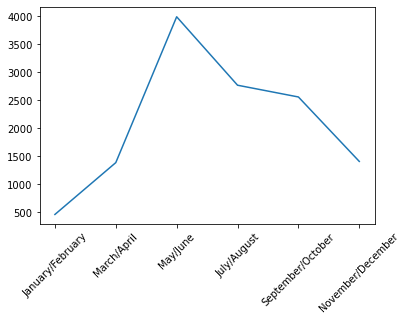

In [35]:
# GRAPH hours fished:  df_sampling_period_sum
df_sampling_period_sum = df_sampling_period_sum.reset_index(drop=False)

x_axis = df_sampling_period_sum["Data sampling period"]
y_axis = df_sampling_period_sum["Hours fished"]

plt.xticks(rotation=45)
plot_hours_fished_sum = plt.plot(x_axis, y_axis)

plt.savefig('s2_data/sampling_period_hours_fished_sum.png')

# = df_sampling_period_sum["Hours fished"]
# df_sampling_period_sum

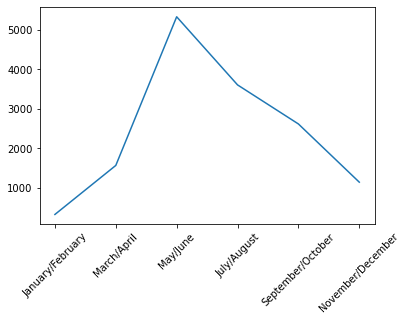

In [36]:
# GRAPH number fish:  df_sampling_period_sum

x_axis = df_sampling_period_sum["Data sampling period"]
y_axis = df_sampling_period_sum["Number of fish avail for inspection"]

plt.xticks(rotation=45)
plot_number_fish_sum = plt.plot(x_axis, y_axis)

plt.savefig('s2_data/sampling_period_num_fish_sum.png')

# = df_sampling_period_sum["Hours fished"]
# df_sampling_period_sum

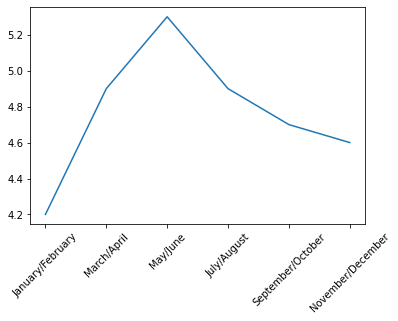

In [37]:
# GRAPH hours fished: df_sampling_period_avg
df_sampling_period_avg = df_sampling_period_avg.reset_index(drop=False)

x_axis = df_sampling_period_avg["Data sampling period"]
y_axis = df_sampling_period_avg["Hours fished"]

plt.xticks(rotation=45)
plot_hours_fished_avg = plt.plot(x_axis, y_axis)

plt.savefig('s2_data/sampling_period_hours_fished_avg.png')

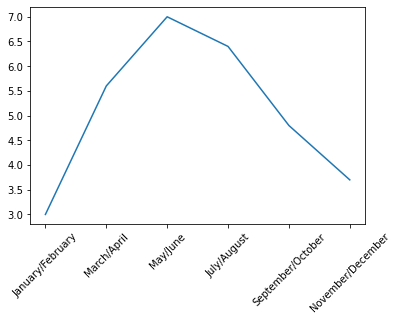

In [38]:
# GRAPH hours fished: df_sampling_period_avg
x_axis = df_sampling_period_avg["Data sampling period"]
y_axis = df_sampling_period_avg["Number of fish avail for inspection"]

plt.xticks(rotation=45)
plot_number_fish_avg = plt.plot(x_axis, y_axis)

plt.savefig('s2_data/sampling_period_num_fish_avg.png')


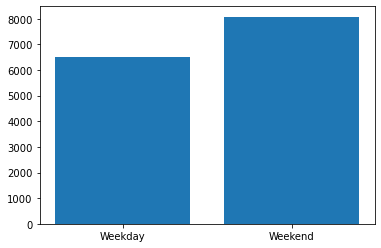

In [39]:
# GRAPH number fish: kind of day sum
df_kind_of_day_sum = df_kind_of_day_sum.reset_index(drop=False)


x_axis = df_kind_of_day_sum["Kind of day"]
y_axis = df_kind_of_day_sum["Number of fish avail for inspection"]

plt.bar(x_axis,y_axis)

plt.savefig('s2_data/kind_day_num_fish_sum.png')


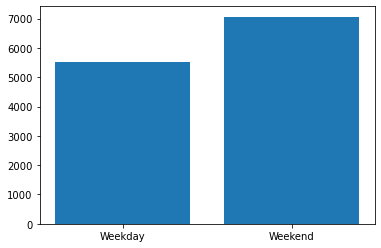

In [40]:
# GRAPH hours fished: kind of day sum

x_axis = df_kind_of_day_sum["Kind of day"]
y_axis = df_kind_of_day_sum["Hours fished"]

plt.bar(x_axis,y_axis)

plt.savefig('s2_data/kind_day_hours_fished_sum.png')


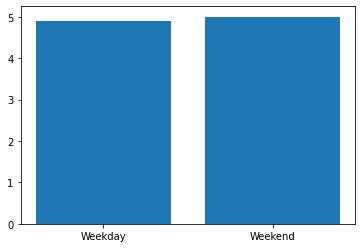

In [41]:
# GRAPH hours fished: kind of day avg
df_kind_of_day_avg = df_kind_of_day_avg.reset_index(drop=False)


x_axis = df_kind_of_day_avg["Kind of day"]
y_axis = df_kind_of_day_avg["Hours fished"]

plt.bar(x_axis,y_axis)

plt.savefig('s2_data/kind_day_hours_fished_avg.png')


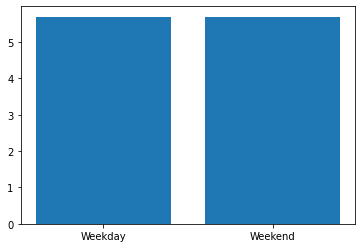

In [42]:
# GRAPH hours fished: kind of day avg
df_kind_of_day_avg = df_kind_of_day_avg.reset_index(drop=False)


x_axis = df_kind_of_day_avg["Kind of day"]
y_axis = df_kind_of_day_avg["Number of fish avail for inspection"]

plt.bar(x_axis,y_axis)

plt.savefig('s2_data/kind_day_num_fish_avg.png')


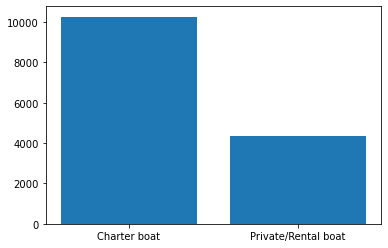

In [43]:
# GRAPH df mode sum
# Fish caught

df_mode_sum = df_mode_sum.reset_index(drop=False)

x_axis = df_mode_sum["Mode of fishing"]
y_axis = df_mode_sum["Number of fish avail for inspection"]

plt.bar(x_axis,y_axis)

plt.savefig('s2_data/mode_num_fish_sum.png')


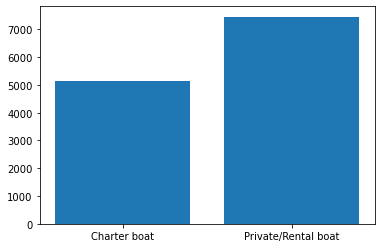

In [44]:
# GRAPH df mode sum
# Hours fished
x_axis = df_mode_sum["Mode of fishing"]
y_axis = df_mode_sum["Hours fished"]

plt.bar(x_axis,y_axis)

plt.savefig('s2_data/mode_hours_fished_sum.png')


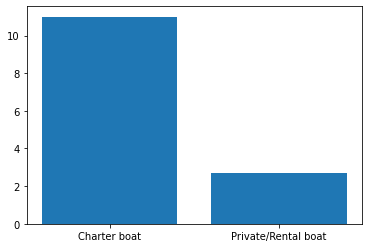

In [45]:
# GRAPH df mode avg
# Fish caught

df_mode_avg = df_mode_avg.reset_index(drop=False)

x_axis = df_mode_avg["Mode of fishing"]
y_axis = df_mode_avg["Number of fish avail for inspection"]

plt.bar(x_axis,y_axis)

plt.savefig('s2_data/mode_num_fish_avg.png')


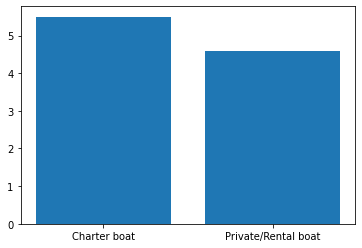

In [46]:
# GRAPH df mode avg
# Hours fished

x_axis = df_mode_avg["Mode of fishing"]
y_axis = df_mode_avg["Hours fished"]

plt.bar(x_axis,y_axis)

plt.savefig('s2_data/mode_hours_fished_avg.png')


In [47]:
# Output dataframes from above

new_output_filepath = "/Users/crkaide/OneDrive - IL State University/Vanderbilt/Vanderbilt/Assignments/20_Final_Project/Team-Frist-Center/s2_data"

df_filtered_values_final.to_csv(f"{new_output_filepath}/df_filtered_values_final.csv",index=False)
df_filtered_keys_final.to_csv(f"{new_output_filepath}/df_filtered_keys_final.csv",index=False)

df_sampling_period_sum.to_csv(f"{new_output_filepath}/df_sampling_period_sum.csv",index=False)
df_sampling_period_avg.to_csv(f"{new_output_filepath}/df_sampling_period_avg.csv",index=False)
df_kind_of_day_sum.to_csv(f"{new_output_filepath}/df_kind_of_day_sum.csv",index=False)
df_kind_of_day_avg.to_csv(f"{new_output_filepath}/df_kind_of_day_avg.csv",index=False)
df_mode_sum.to_csv(f"{new_output_filepath}/df_mode_sum.csv",index=False)
df_mode_avg.to_csv(f"{new_output_filepath}/df_mode_avg.csv",index=False)
df_target_sum.to_csv(f"{new_output_filepath}/df_target_sum.csv",index=False)
df_target_avg.to_csv(f"{new_output_filepath}/df_target_avg.csv",index=False)
